In [2]:
# importing all the libraries 

import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans

In [3]:
# Read the input data
data = pd.read_csv("./data/data.csv")

# Preprocess the data
label_encoder = LabelEncoder()
data['sales'] = label_encoder.fit_transform(data['sales'])
data['salary'] = label_encoder.fit_transform(data['salary'])

# Show only 10 samples of the data
data.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
2118,0.93,0.52,4,200,3,0,0,0,9,1
12106,0.91,1.00,4,257,5,0,1,0,2,2
3125,0.84,0.79,4,222,3,0,0,0,1,1
1499,0.44,0.48,2,128,3,0,1,0,8,1
14146,0.50,0.86,3,180,7,0,0,1,4,0
7805,0.17,0.45,2,119,3,0,0,0,7,2
9272,0.95,0.51,3,254,4,0,0,0,9,2
10240,0.96,0.62,5,230,2,0,0,0,7,2
12621,0.10,0.86,6,247,4,0,1,0,7,2
8247,0.99,0.65,3,209,2,1,0,0,8,1


In [4]:
# Counts employees who left the company
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

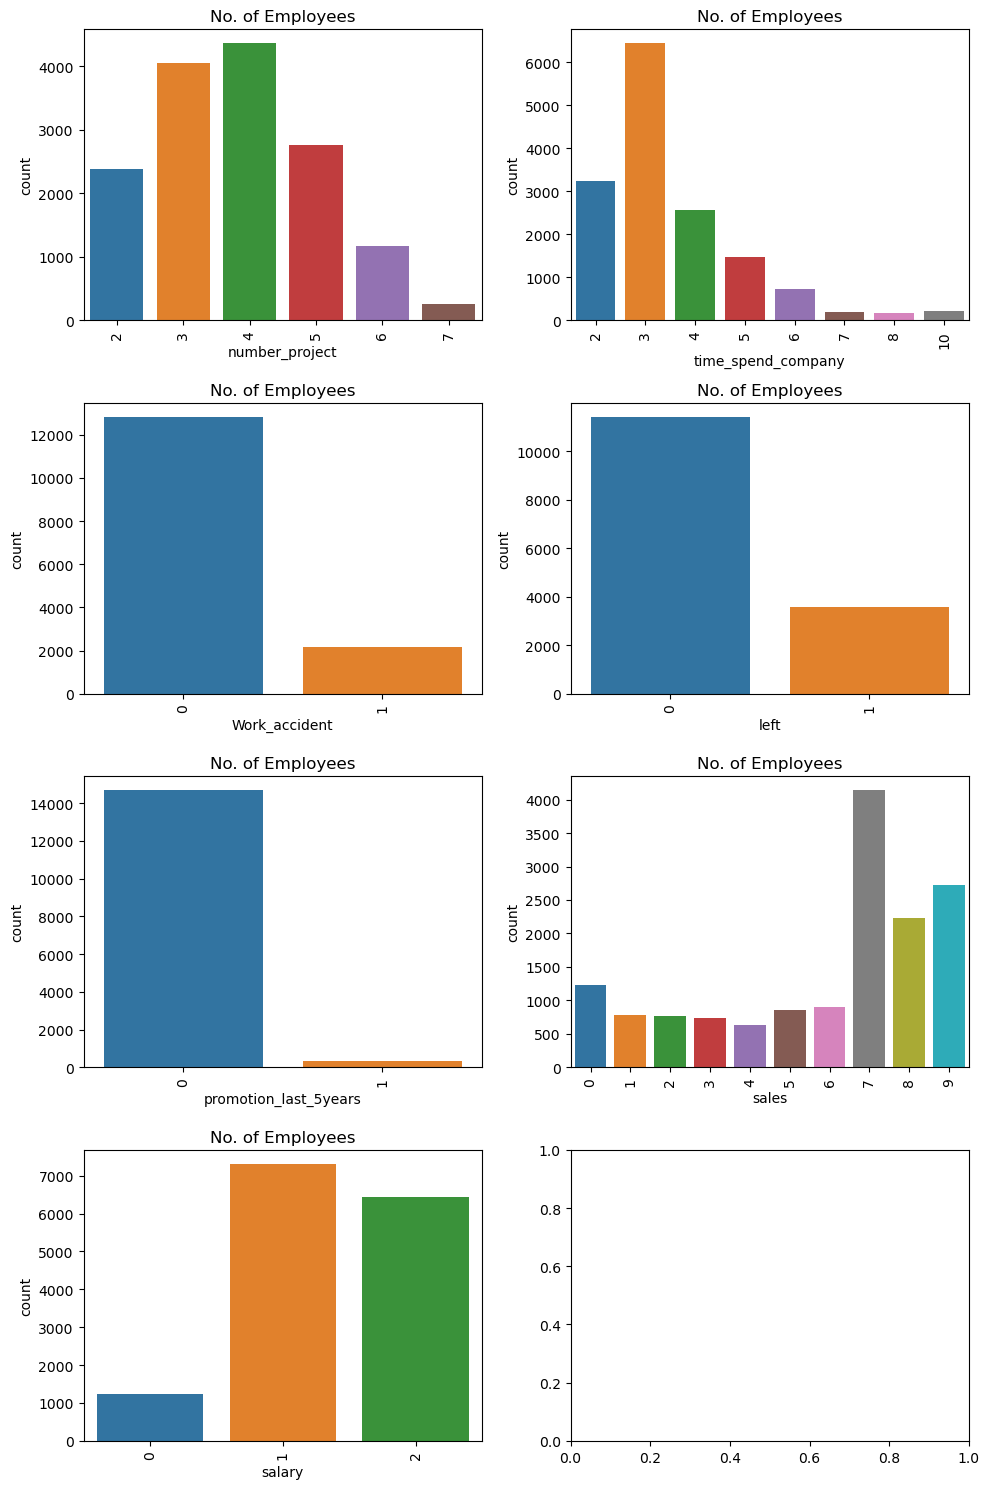

In [5]:
features = ['number_project', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

fig, axs = plt.subplots(4, 2, figsize=(10, 15))

for i, j in enumerate(features):
    ax = axs[i // 2, i % 2]
    sns.countplot(x=j, data=data, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title("No. of Employees")

# Remove overlapping axes
plt.tight_layout()
plt.show()

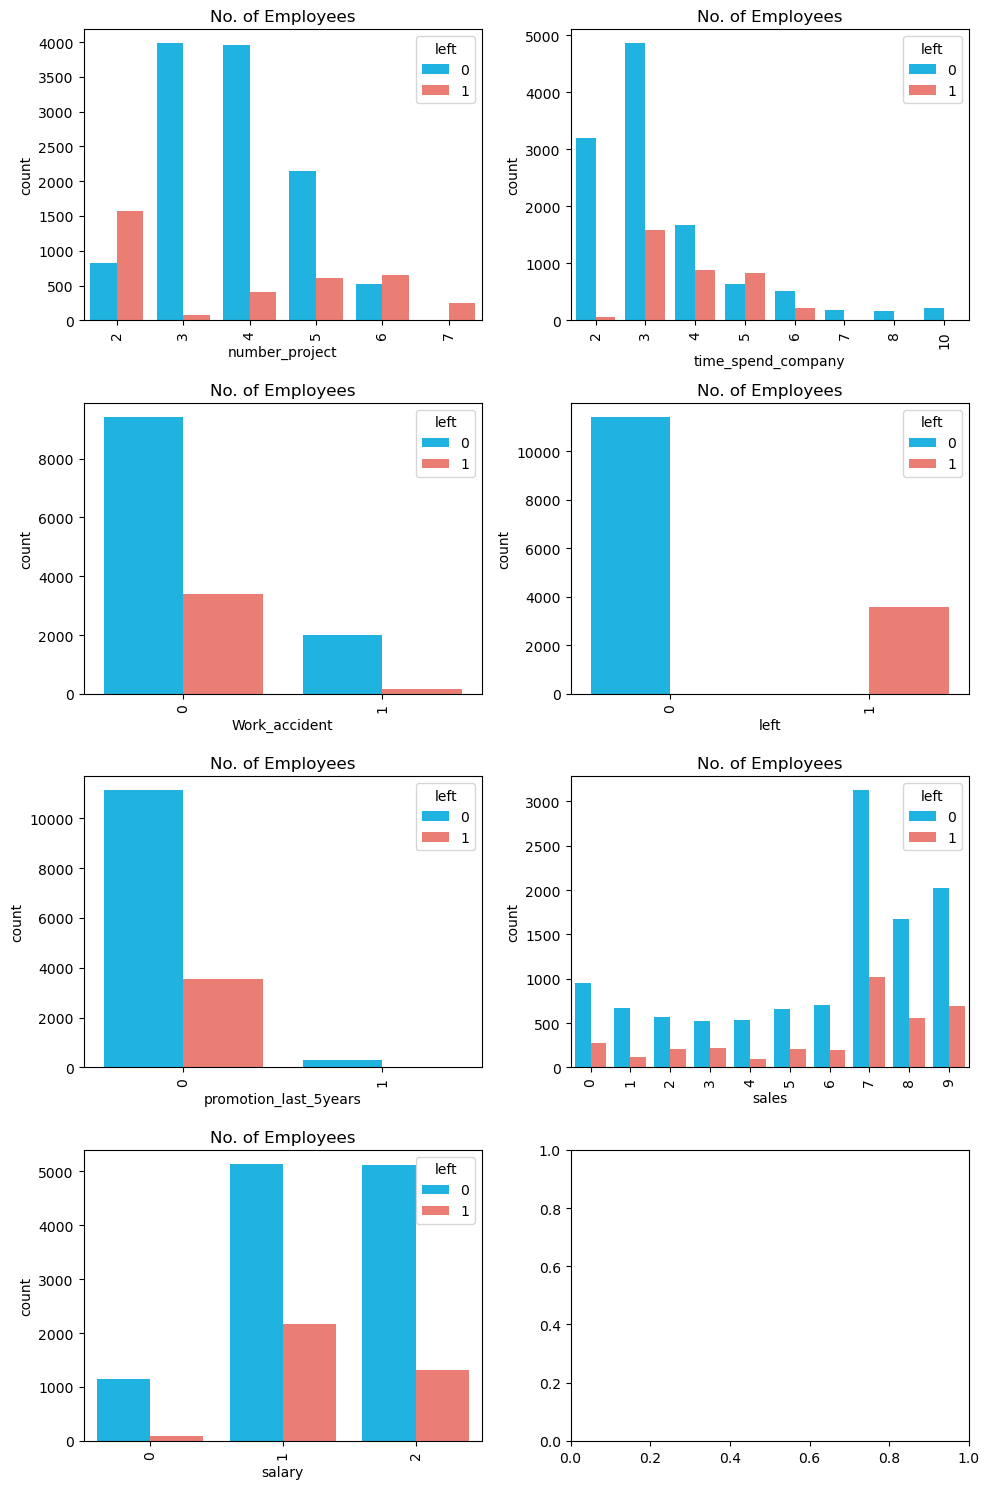

In [6]:
colors = ['#00C4FF', '#FF6D60']

fig, axs = plt.subplots(4, 2, figsize=(10, 15))

for i, j in enumerate(features):
    ax = axs[i // 2, i % 2]
    sns.countplot(x=j, data=data, hue='left', palette=colors, hue_order=[0, 1], ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title("No. of Employees")

# Remove overlapping axes
plt.tight_layout()
plt.show()

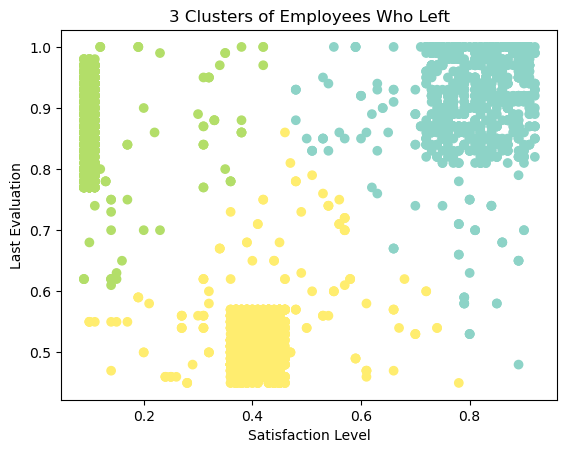

In [7]:
left_emp = data[data['left'] == 1][['satisfaction_level', 'last_evaluation']]
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10).fit(left_emp)
left_emp['label'] = kmeans.labels_
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'], cmap='Set3')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of Employees Who Left')
plt.show()

In [8]:
# Spliting data into Feature and target
X=data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company',
        'Work_accident', 'promotion_last_5years', 'sales', 'salary']]
y=data['left']


# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into 70% training set and 30% test set.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train,y_train)

Iteration 1, loss = 0.61512605
Iteration 2, loss = 0.57545658
Iteration 3, loss = 0.55823146
Iteration 4, loss = 0.53011644
Iteration 5, loss = 0.50549749
Iteration 6, loss = 0.48004244
Iteration 7, loss = 0.47915513
Iteration 8, loss = 0.46239153
Iteration 9, loss = 0.47441120
Iteration 10, loss = 0.46241650
Iteration 11, loss = 0.45068143
Iteration 12, loss = 0.45071101
Iteration 13, loss = 0.45213613
Iteration 14, loss = 0.46049483
Iteration 15, loss = 0.45897398
Iteration 16, loss = 0.46170601
Iteration 17, loss = 0.45527116
Iteration 18, loss = 0.44996595
Iteration 19, loss = 0.44982305
Iteration 20, loss = 0.45384764
Iteration 21, loss = 0.46981282
Iteration 22, loss = 0.45010489
Iteration 23, loss = 0.46852413
Iteration 24, loss = 0.45242336
Iteration 25, loss = 0.45769894
Iteration 26, loss = 0.45074974
Iteration 27, loss = 0.44067556
Iteration 28, loss = 0.43205930
Iteration 29, loss = 0.41680331
Iteration 30, loss = 0.40752887
Iteration 31, loss = 0.39186392
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [9]:
# Make prediction on test dataset
ypred=clf.predict(X_test)

# Import scikit-learn metrics module for calculation
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred))

# Model Precision
print("Precision:",metrics.precision_score(y_test, ypred))

# Model Recall
print("Recall:",metrics.recall_score(y_test, ypred))

# Model F-score
print("F-score:",metrics.f1_score(y_test, ypred))

Accuracy: 0.9386666666666666
Precision: 0.8442906574394463
Recall: 0.9104477611940298
F-score: 0.8761220825852784
